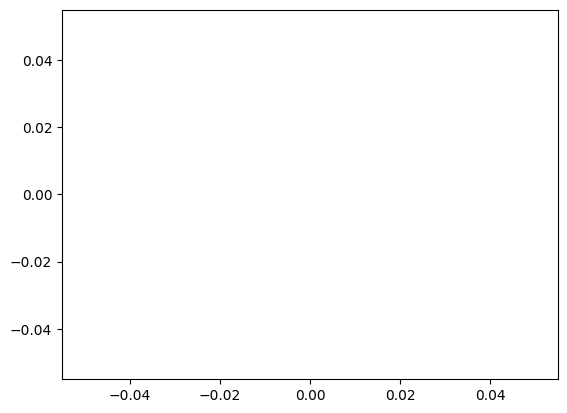

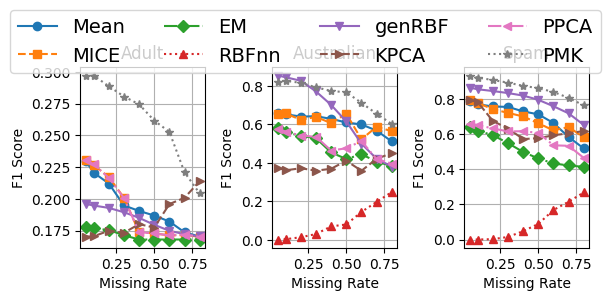

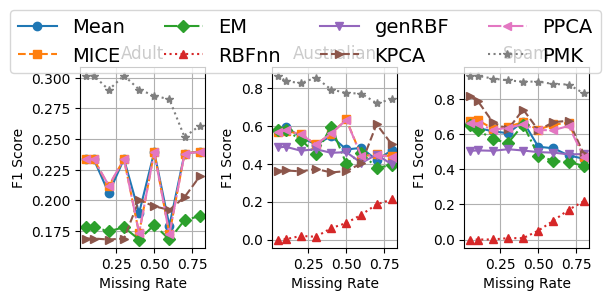

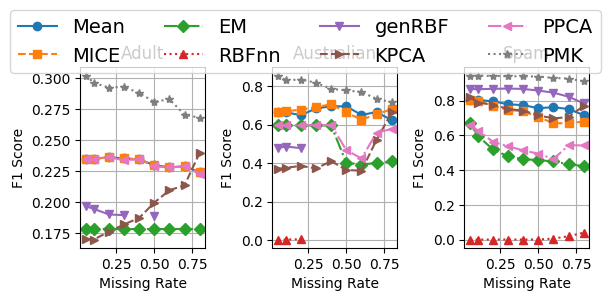

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the folder names and types
datanames = ["car", "breast", "australian", "heart", "adult", "student", "banknote", "sonar", "spam", "wine"]
datanames = ["australian","adult","spam"]
typenames = ['mcar', 'mar', "mnar"]  # You can add more types if necessary
#typenames = ['mnar']  # You can add more types if necessary
models = ["mean", "mice",  "em", "rbfn", "genrbf","kpca", "ppca","mpk"]  # List of models used
missrates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Define markers and line styles
markers = ['o', 's', 'D', '^', 'v', '>', '<', '*', 'x']  # Different markers
line_styles = ['-', '--', '-.', ':']  # Different line styles

# Use the default color palette from Matplotlib
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary to hold the style for each model
model_styles = {model: {
                    'marker': markers[i % len(markers)],
                    'line_style': line_styles[i % len(line_styles)],
                    'color': colors[i % len(colors)]
                 } for i, model in enumerate(models)}

formal_model_names = {
    "mean": "Mean",
    "mice": "MICE",
    "rbfn": "RBFnn",
    "genrbf": "genRBF",
    "em": "EM",
    "ik":"IK",
    "kpca": "KPCA",
    "ppca": "PPCA",
    "mpk": "PMK",
    "impk":"iPMK"
}
# Create predefined handles and labels for legend using the dictionary
predefined_handles = []
predefined_labels = []

for model, style in model_styles.items():
    # Use an empty plot to create the handles without plotting data
    line, = plt.plot([], [], label=model, marker=style['marker'], linestyle=style['line_style'], color=style['color'])
    
    # Store predefined handles and labels for later use
    predefined_handles.append(line)
    predefined_labels.append(formal_model_names[model])

# Sort the dataset names alphabetically and capitalize them
datanames_sorted = sorted([name.capitalize() for name in datanames])

# Your plotting code
# Create the plots
for typename in typenames:
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))  # Adjust the figure size to better fit 2x5 layout
    #fig.suptitle(f'Performance for Type: {typename}', fontsize=20)
    
    # Flatten axs to access the subplots in a 1D fashion
    axs = axs.flatten()  # Convert 2D axs array to 1D for easier indexing
    
    for i, dataname in enumerate(datanames_sorted):  # Loop through the sorted and capitalized dataset names
        ax = axs[i]  # Access the appropriate subplot

        for model in models:
            # Construct the file path
            filepath = f"results/{typename}/{dataname.lower()}/{model}.csv"  # Convert to lowercase for the filepath
            if os.path.exists(filepath):
                # Read the CSV file and transpose it
                df = pd.read_csv(filepath, header=None).T
                
                # Set the first row as the new header
                df.columns = df.iloc[0]
                df = df[1:]  # Remove the first row, now it's the header
                
                # Convert the columns to numeric for plotting
                df = df.apply(pd.to_numeric, errors='ignore')
                
                try:
                    # Check if the required column ('avg_f1_score') exists and plot
                    if 'avg_f1_score' in df.columns:
                        # Get the model's style from the dictionary
                        style = model_styles[model]
                        
                        formal_name = formal_model_names[model]
                        
                        ax.plot(missrates, df['avg_f1_score'], marker=style['marker'], 
                                linestyle=style['line_style'], color=style['color'], label=formal_name)
                except Exception as e:
                    # Print the file path and the error message
                    print(f"Error processing {filepath}: {e}")

        # Set titles and labels for each plot
        ax.set_title(f'{dataname}')  # Use the capitalized dataset name
        ax.set_xlabel('Missing Rate')
        ax.set_ylabel('F1 Score')
        ax.grid(True)
    # Create a single global legend at the top using predefined handles and labels
    fig.legend(handles=predefined_handles, labels=predefined_labels, loc='upper center', ncol=4,
               bbox_to_anchor=(0.5, 1.05), fontsize=14)  # Increased fontsize to 14

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.savefig(f'performance_f1_score_plots_{typename}.png')
    #plt.savefig(f"F1_{typename}.pdf", format="pdf", bbox_inches="tight")
    # plt.show()

Error processing results/mnar/car/rbfn.csv: x and y must have same first dimension, but have shapes (9,) and (1,)


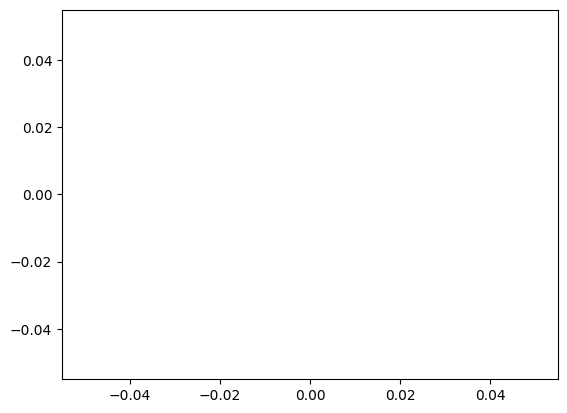

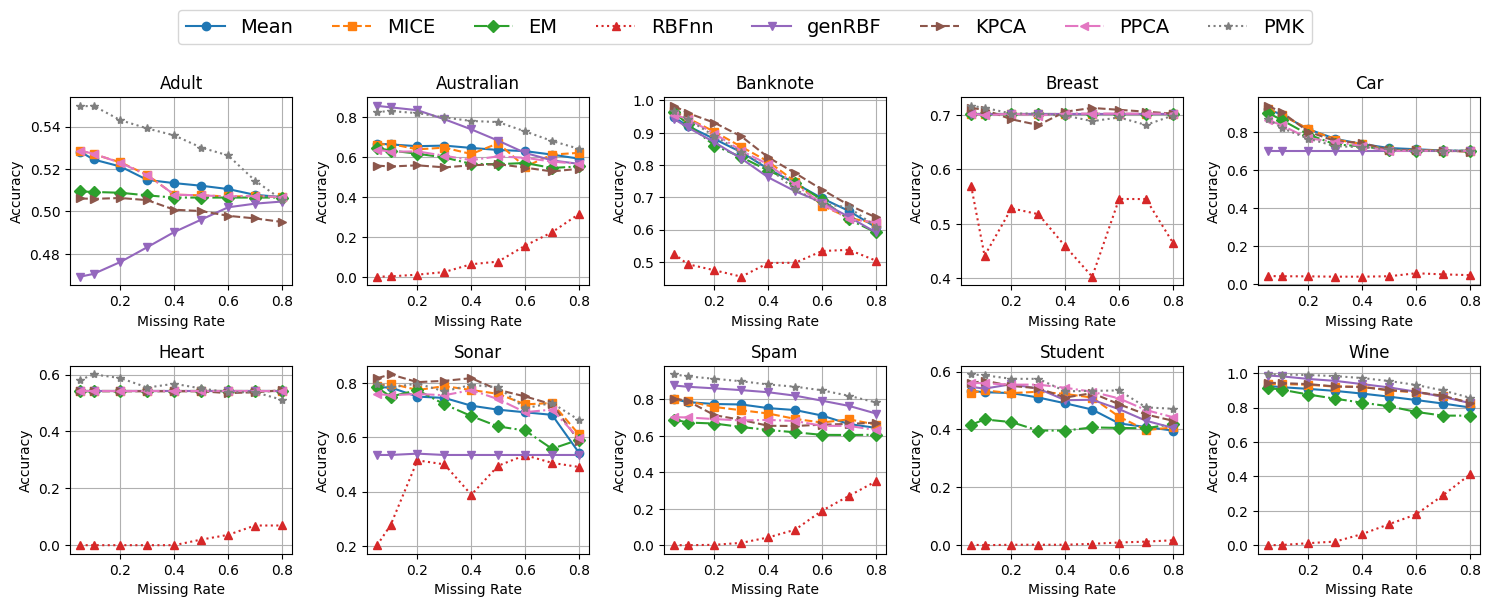

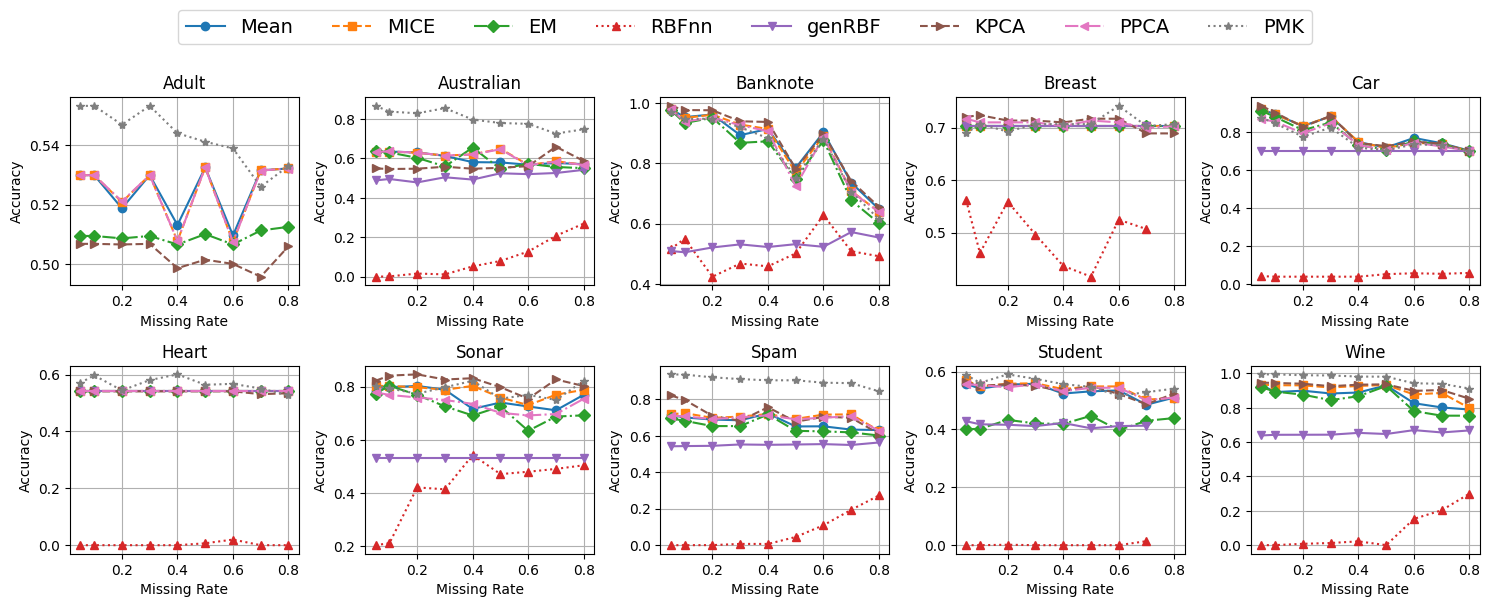

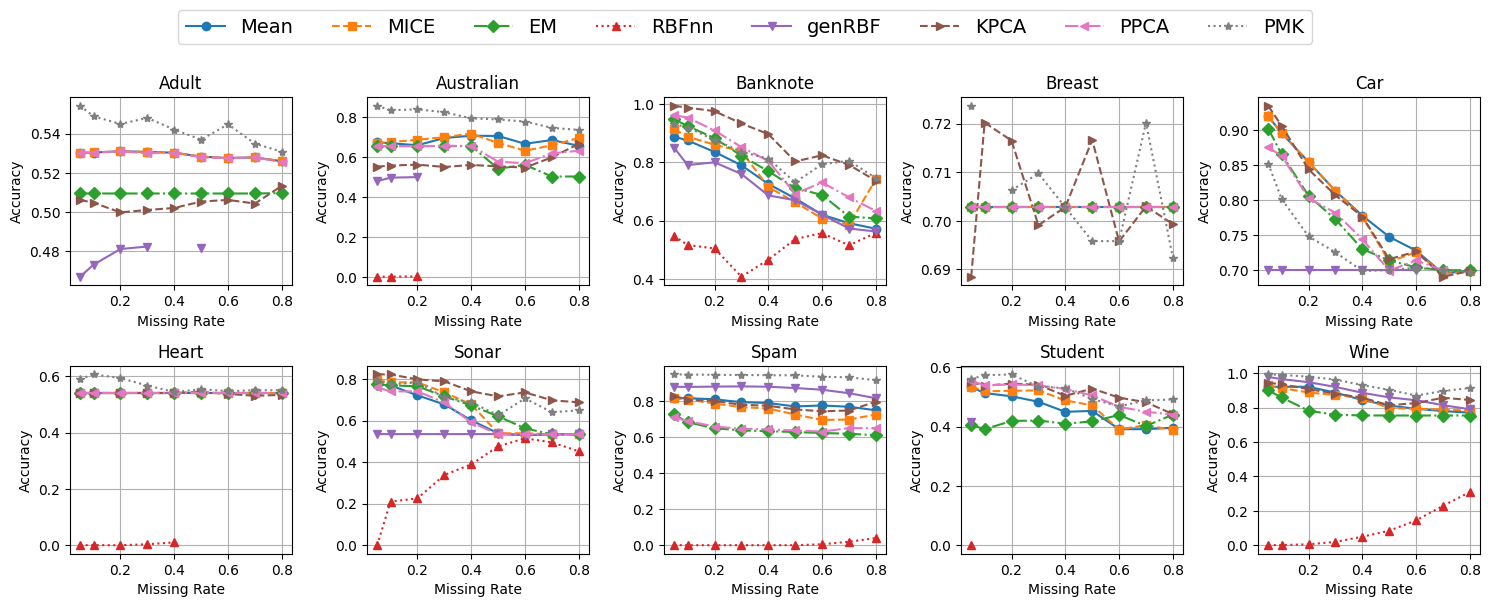

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the folder names and types
datanames = ["car", "breast", "australian", "heart", "adult", "student", "banknote", "sonar", "spam", "wine"]
typenames = ['mcar',"mar","mnar"]  # You can add more types if necessary
models = ["mean", "mice",  "em", "rbfn", "genrbf","kpca", "ppca","mpk"]   # List of models used
missrates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Define markers and line styles
markers = ['o', 's', 'D', '^', 'v', '>', '<', '*', 'x']  # Different markers
line_styles = ['-', '--', '-.', ':']  # Different line styles

# Use the default color palette from Matplotlib
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary to hold the style for each model
model_styles = {model: {
                    'marker': markers[i % len(markers)],
                    'line_style': line_styles[i % len(line_styles)],
                    'color': colors[i % len(colors)]
                 } for i, model in enumerate(models)}

# Create predefined handles and labels for legend using the dictionary
predefined_handles = []
predefined_labels = []

for model, style in model_styles.items():
    # Use an empty plot to create the handles without plotting data
    line, = plt.plot([], [], label=model, marker=style['marker'], linestyle=style['line_style'], color=style['color'])
    
    # Store predefined handles and labels for later use
    predefined_handles.append(line)
    predefined_labels.append(formal_model_names[model])

# Sort the dataset names alphabetically and capitalize them
datanames_sorted = sorted([name.capitalize() for name in datanames])

# Your plotting code
# Create the plots
for typename in typenames:
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the figure size to better fit 2x5 layout
    #fig.suptitle(f'Performance for Type: {typename}', fontsize=20)
    
    # Flatten axs to access the subplots in a 1D fashion
    axs = axs.flatten()  # Convert 2D axs array to 1D for easier indexing
    
    for i, dataname in enumerate(datanames_sorted):  # Loop through the sorted and capitalized dataset names
        ax = axs[i]  # Access the appropriate subplot

        for model in models:
            # Construct the file path
            filepath = f"results/{typename}/{dataname.lower()}/{model}.csv"  # Convert to lowercase for the filepath
            if os.path.exists(filepath):
                # Read the CSV file and transpose it
                df = pd.read_csv(filepath, header=None).T
                
                # Set the first row as the new header
                df.columns = df.iloc[0]
                df = df[1:]  # Remove the first row, now it's the header
                
                # Convert the columns to numeric for plotting
                df = df.apply(pd.to_numeric, errors='ignore')
                
                try:
                    # Check if the required column ('avg_accuracy') exists and plot
                    if 'avg_accuracy' in df.columns:
                        # Get the model's style from the dictionary
                        style = model_styles[model]
                        formal_name = formal_model_names[model]
                        # Plot the Accuracy with unique marker, line style, and color
                        ax.plot(missrates, df['avg_accuracy'], marker=style['marker'], 
                                linestyle=style['line_style'], color=style['color'], label=formal_name)
                except Exception as e:
                    # Print the file path and the error message
                    print(f"Error processing {filepath}: {e}")

        # Set titles and labels for each plot
        ax.set_title(f'{dataname}')  # Use the capitalized dataset name
        ax.set_xlabel('Missing Rate')
        ax.set_ylabel('Accuracy')
        ax.grid(True)
    
    # Create a single global legend at the top using predefined handles and labels
    fig.legend(handles=predefined_handles, labels=predefined_labels, loc='upper center', ncol=len(models),
               bbox_to_anchor=(0.5, 1.05), fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'ACC_{typename}.pdf',format="pdf", bbox_inches="tight")
    # #tikzplotlib.save(f'performance_accuracy_plots_{typename}.tex')
    
    # plt.show()

In [ ]:
pip install tikzplotlib

In [7]:
pip install 'critdd @ git+https://github.com/mirkobunse/critdd'

  Cloning https://github.com/mirkobunse/critdd to /private/var/folders/yl/h1fq6f_x6tj819lfbsgb561h0000gn/T/pip-install-z3sn3omi/critdd_824b319d4b0f4a7dbf1b15dfeda82846
  Running command git clone --filter=blob:none --quiet https://github.com/mirkobunse/critdd /private/var/folders/yl/h1fq6f_x6tj819lfbsgb561h0000gn/T/pip-install-z3sn3omi/critdd_824b319d4b0f4a7dbf1b15dfeda82846
  Resolved https://github.com/mirkobunse/critdd to commit 9d741a76924cf27827a4f26d23e0fc243eafbaca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for critdd: filename=critdd-0.0.5.dev0-py3-none-any.whl size=25892 sha256=b525d1c7354cf014b9dbd73c0fb3c08f64dabc365a1d83eedd97c05da1a5f2ef
  Stored in directory: /private/var/folders/yl/h1fq6f_x6tj819lfbsgb561h0000gn/T/pip-ephem-wheel-cache-lvp3b1pq/wheels/4c/05/d2/fc7bb970ce1e93e745a737f40c32220c618159bd95676b102b
Successfully built critdd
Note: you may need to restart

In [6]:
pip install critdd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement critdd (from versions: none)
ERROR: No matching distribution found for critdd


In [5]:
from critdd import Diagram
import pandas as pd

# # download example data
# _URL = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/example.csv"
# df = pd.read_csv(_URL).pivot(
#     index = "dataset_name",
#     columns = "classifier_name",
#     values = "accuracy"
# )

# # create a CD diagram from the Pandas DataFrame
# diagram = Diagram(
#     df.to_numpy(),
#     treatment_names = df.columns,
#     maximize_outcome = True
# )

# # inspect average ranks and groups of statistically indistinguishable treatments
# diagram.average_ranks # the average rank of each treatment
# diagram.get_groups(alpha=.05, adjustment="holm")



ModuleNotFoundError: No module named 'critdd'

In [16]:
# download example data
_URL = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/example.csv"
df = pd.read_csv(_URL).pivot(
    index = "dataset_name",
    columns = "classifier_name",
    values = "accuracy"
)

# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    df.to_numpy(),
    treatment_names = df.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

/Users/epochoid/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


[array([0, 1, 3]), array([2, 4])]

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the folder names and types
datanames = ["car", "breast", "australian", "heart", "adult", "student", "banknote", "sonar", "spam", "wine"]
typenames = ['mnar', 'mcar', "mar"]  # You can add more types if necessary
models = ["mean", "mice", "rbfn", "genrbf", "em", "kpca", "ppca", "mpk"]  # List of models used
missrates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Sort the dataset names alphabetically and capitalize them
datanames_sorted = sorted([name.capitalize() for name in datanames])

# Initialize dictionaries to store rankings
rankings_accuracy = {typename: {model: [] for model in models} for typename in typenames}
rankings_f1 = {typename: {model: [] for model in models} for typename in typenames}

# Function to rank models and handle missing data (None or NaN ranked last)
def rank_models(df, column, models):
    scores = df[column].values
    ranks = pd.Series(scores).rank(ascending=False, method='min').fillna(len(models)).astype(int)
    return ranks

# Loop through each missing type and generate rankings
for typename in typenames:
    for dataname in datanames_sorted:  # Loop through the sorted and capitalized dataset names
        for missrate in missrates:
            model_scores = {'avg_accuracy': [], 'avg_f1_score': []}
            
            for model in models:
                # Construct the file path
                filepath = f"results/{typename}/{dataname.lower()}/{model}.csv"  # Convert to lowercase for the filepath
                if os.path.exists(filepath):
                    # Read the CSV file and transpose it
                    df = pd.read_csv(filepath, header=None).T
                    
                    # Set the first row as the new header
                    df.columns = df.iloc[0]
                    df = df[1:]  # Remove the first row, now it's the header
                    
                    # Convert the columns to numeric for ranking
                    df = df.apply(pd.to_numeric, errors='coerce')
                    
                    # Append scores for accuracy and F1 (if present) or use None
                    model_scores['avg_accuracy'].append(df.get('avg_accuracy', [None]).values[0])
                    model_scores['avg_f1_score'].append(df.get('avg_f1_score', [None]).values[0])
                else:
                    model_scores['avg_accuracy'].append(None)
                    model_scores['avg_f1_score'].append(None)
            
            # Create a DataFrame for the scores of the current dataset and missing rate
            score_df = pd.DataFrame(model_scores, index=models)
            
            # Rank models for accuracy and F1 score, and store the ranks
            rankings_accuracy[typename] = {
                model: rankings_accuracy[typename][model] + [rank] 
                for model, rank in zip(models, rank_models(score_df, 'avg_accuracy', models))
            }
            rankings_f1[typename] = {
                model: rankings_f1[typename][model] + [rank] 
                for model, rank in zip(models, rank_models(score_df, 'avg_f1_score', models))
            }

# Summarize rankings across datasets and missing rates (get total ranks)
def summarize_rankings(ranking_dict):
    summary = {}
    for typename, model_ranks in ranking_dict.items():
        summary[typename] = {model: np.mean(ranks) for model, ranks in model_ranks.items()}
    return summary

# Summarize the rankings for both accuracy and F1 score
summary_accuracy = summarize_rankings(rankings_accuracy)
summary_f1 = summarize_rankings(rankings_f1)

# Output rankings
print("Summary Rankings (Accuracy):")
print(pd.DataFrame(summary_accuracy).sort_index())

print("\nSummary Rankings (F1 Score):")
print(pd.DataFrame(summary_f1).sort_index())

Summary Rankings (Accuracy):
        mnar  mcar  mar
em       4.4   4.9  4.5
genrbf   5.5   4.6  6.1
kpca     3.2   3.1  2.5
mean     3.5   4.0  3.2
mice     3.1   3.3  2.7
mpk      2.0   1.7  2.7
ppca     4.0   4.8  4.3
rbfn     7.9   7.9  7.8

Summary Rankings (F1 Score):
        mnar  mcar  mar
em       4.6   4.9  4.6
genrbf   5.2   4.8  6.0
kpca     3.1   2.8  2.5
mean     3.4   4.1  3.2
mice     3.1   3.4  3.0
mpk      1.9   1.8  2.2
ppca     4.6   4.9  4.4
rbfn     7.9   7.9  7.9


In [17]:
import os
import pandas as pd
import numpy as np

# Define the folder names and types
datanames = ["car", "breast", "australian", "heart", "adult", "student", "banknote", "sonar", "spam", "wine"]
typenames = ['mnar', 'mcar', "mar"]  # You can add more types if necessary
models = ["mean", "mice", "rbfn", "genrbf", "ik", "kpca", "ppca", "mpk", "impk"]  # List of classifiers
missrates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Missing rates

# Create a dictionary to store DataFrames for each missing type
df_dict = {typename: pd.DataFrame() for typename in typenames}

# Iterate through each missing type and populate the corresponding DataFrame
for typename in typenames:
    data_for_df = []
    for dataname in datanames:
        for missrate in missrates:
            row_data = {'dataset_name': f"{dataname}_rate_{missrate}"}  # Create the row label with dataset and missing rate
            for model in models:
                # Construct the file path
                filepath = f"results/{typename}/{dataname}/{model}.csv"
                if os.path.exists(filepath):
                    # Read the CSV file and transpose it
                    df = pd.read_csv(filepath, header=None).T
                    
                    # Set the first row as the new header
                    df.columns = df.iloc[0]
                    df = df[1:]  # Remove the first row, now it's the header
                    
                    # Convert the columns to numeric and replace missing values with 0
                    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
                    
                    # Extract the required value (e.g., avg_accuracy)
                    if 'avg_accuracy' in df.columns:
                        row_data[model] = df['avg_accuracy'].values[0]
                    else:
                        row_data[model] = 0  # If the column doesn't exist, default to 0
                else:
                    row_data[model] = 0  # If file doesn't exist, default to 0
            
            data_for_df.append(row_data)

    # Create a DataFrame for this missing type
    df_dict[typename] = pd.DataFrame(data_for_df)

# # Output the DataFrame for each missing type
# for typename, df in df_dict.items():
#     print(f"DataFrame for {typename}:")
#     print(df.head())  # Display the first few rows
#     # Save the DataFrame to CSV (optional)
#     df.to_csv(f'ranking_{typename}.csv', index=False)

In [9]:
import os
import pandas as pd
import warnings

# Ignore specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the folder names and types
datanames = ["car", "breast", "australian", "heart", "adult", "student", "banknote", "sonar", "spam", "wine"]
typenames = ['mnar', 'mcar', "mar"]  # You can add more types if necessary
models = ["mean", "mice", "rbfn", "genrbf", "em", "kpca", "ppca", "mpk"] # List of classifiers
missrates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Missing rates

# Initialize an empty DataFrame to store results
ranking_df = pd.DataFrame(columns=["classifier_name", "dataset_name", "accuracy"])

# Iterate through each missing type and populate the corresponding DataFrame
for typename in typenames:
    for dataname in datanames:
        for missrate in missrates:
            for model in models:
                # Construct the file path
                filepath = f"results/{typename}/{dataname}/{model}.csv"
                if os.path.exists(filepath):
                    # Read the CSV file and transpose it
                    df = pd.read_csv(filepath, header=None).T
                    
                    # Set the first row as the new header
                    df.columns = df.iloc[0]
                    df = df[1:]  # Remove the first row, now it's the header
                    
                    # Convert the columns to numeric and replace missing values with 0
                    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
                    
                    # Extract the required value (e.g., avg_accuracy)
                    if 'avg_accuracy' in df.columns:
                        accuracy = df['avg_accuracy'].values[0]
                    else:
                        accuracy = 0  # If the column doesn't exist, default to 0

                    # Format the dataset_name by converting the missing rate to an integer percentage
                    dataset_name = f"{dataname}_rate_{str(int(missrate * 100))}"

                    # Append the result to the ranking DataFrame
                    ranking_df = ranking_df.append({
                        "classifier_name": model,
                        "dataset_name": dataset_name,
                        "accuracy": accuracy
                    }, ignore_index=True)
# Output the ranking DataFrame
ranking_df.head() # Display the first few rows

# # Save the ranking DataFrame to a CSV file (optional)
# ranking_df.to_csv('ranking_accuracy.csv', index=False)

,classifier_name,dataset_name,accuracy
0,mean,car_rate_5,0.918993
1,mice,car_rate_5,0.918993
2,rbfn,car_rate_5,0.000000
3,genrbf,car_rate_5,0.700233
4,em,car_rate_5,0.901634


In [10]:
ranking_df.to_csv("ranking.csv",index=False)

In [3]:
#

duplicates = ranking_df.duplicated(subset=["dataset_name", "classifier_name"], keep=False)

# If there are duplicates, print them to investigate
if duplicates.any():
    print("Duplicate entries found:")
    print(ranking_df[duplicates])

# Option 1: Remove duplicates and keep the first occurrence
ranking_df_unique = ranking_df.drop_duplicates(subset=["dataset_name", "classifier_name"], keep='first')


# Now you can proceed with any operations on the DataFrame, for example:
df_pivot = ranking_df_unique.pivot(
    index="dataset_name", 
    columns="classifier_name", 
    values="accuracy"
)

# Fill NaN values with 0
ranking_df_filled = df_pivot.fillna(0)


Duplicate entries found:
     classifier_name  dataset_name  accuracy
0               mean    car_rate_5  0.918993
1               mice    car_rate_5  0.918993
2               rbfn    car_rate_5  0.000000
3             genrbf    car_rate_5  0.700233
4                 em    car_rate_5  0.901634
...              ...           ...       ...
2335          genrbf  wine_rate_80  0.638759
2336              em  wine_rate_80  0.919040
2337            kpca  wine_rate_80  0.946282
2338             mpk  wine_rate_80  0.994151
2339            impk  wine_rate_80  0.967680

[2340 rows x 3 columns]


In [4]:
# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    ranking_df_filled.to_numpy(),
    treatment_names = ranking_df_filled.columns,
    maximize_outcome = True
)

# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "example.tex",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

NameError: name 'Diagram' is not defined

In [ ]:
import os

# Define datasets, models, and missing types
datasets = ["car", "breast", "australian", "heart", "student", "banknote", "sonar", "spam", "wine"]
models = ["mice", "mean", "genrbf","rbfn"]
missing_types = ["mcar", "mar", "mnar"]

# Check if CSVs were generated properly
missing_files = []

for dataset in datasets:
    for model in models:
        for missing_type in missing_types:
            # Construct the file path
            file_path = f"results/{missing_type}/{dataset}/{model}.csv"
            # Check if the file exists
            if not os.path.exists(file_path):
                missing_files.append(file_path)

# Print the results
if missing_files:
    print("The following CSV files are missing or were not generated properly:")
    for file in missing_files:
        print(file)
else:
    print("All CSV files were generated properly.")

In [174]:
import os
import subprocess

# Define datasets, models, and missing types
datasets = ["car", "breast", "australian", "heart", "student", "banknote", "sonar", "spam","adult"]
models = ["rbfn","genrbf","ik","kpca","mpk","mean","mice","ppca","impk"]
# IMPK - EM
models = ["em"]
missing_types = ["mcar", "mar", "mnar"]

# Function to check if the CSV file exists
def csv_exists(missing_type, dataset, model):
    output_path = f"results/{missing_type}/{dataset}/{model}.csv"
    return os.path.exists(output_path)

# Loop through datasets, models, and missing types
for dataset in datasets:
    for missing_type in missing_types:
        for model in models:
            # Check if the CSV file exists
            if not csv_exists(missing_type, dataset, model):
                print(f"CSV does not exist: results/{missing_type}/{dataset}/{model}.csv")
                # If the CSV does not exist, run the Python script
                #print(f"Running Python script for dataset {dataset}, model {model}, and missing type {missing_type}...")
                #subprocess.run(["python", "main.py", "--datasets", dataset, "--models", model, "--missing_types", missing_type, "--save"])
            #else:
                #print(f"CSV exists: results/{missing_type}/{dataset}/{model}.csv")

CSV does not exist: results/mar/car/em.csv
CSV does not exist: results/mar/breast/em.csv
CSV does not exist: results/mar/australian/em.csv
CSV does not exist: results/mar/heart/em.csv
CSV does not exist: results/mar/student/em.csv
CSV does not exist: results/mar/banknote/em.csv
CSV does not exist: results/mar/sonar/em.csv
CSV does not exist: results/mar/spam/em.csv
CSV does not exist: results/mcar/adult/em.csv
CSV does not exist: results/mar/adult/em.csv
CSV does not exist: results/mnar/adult/em.csv


In [27]:
import os
# Define datasets, models, and missing types
datasets = ["hepatitis","horse","kidney","mammo","pima","winconsin"]
models = ["genrbf","ik","kpca","mean","mice","ppca",
          #"impk","mpk"
          ]
# IMPK - EM
missing_types = ["mcar"]

# Function to check if the CSV file exists
def csv_exists(missing_type, dataset, model):
    output_path = f"results/{missing_type}/{dataset}/{model}.csv"
    return os.path.exists(output_path)

# Loop through datasets, models, and missing types
for dataset in datasets:
    for missing_type in missing_types:
        for model in models:
            # Check if the CSV file exists
            if not csv_exists(missing_type, dataset, model):
                print(f"CSV does not exist: results/{missing_type}/{dataset}/{model}.csv")

CSV does not exist: results/mcar/hepatitis/ik.csv


In [10]:
import os

# Define datasets, models, and missing types
datasets = ["hepatitis","horse","kidney","mammo","pima","winconsin"]
models = ["genrbf","ik","kpca","mean","mice","ppca",
          "impk","mpk"
          ]
# IMPK - EM
missing_types = ["mcar"]

# Function to check if the CSV file exists
def csv_exists(missing_type, dataset, model):
    output_path = f"results/{missing_type}/{dataset}/{model}.csv"
    return os.path.exists(output_path)

# Loop through datasets, models, and missing types
for dataset in datasets:
    for missing_type in missing_types:
        for model in models:
            # Check if the CSV file exists
            if not csv_exists(missing_type, dataset, model):
                print(f"CSV does not exist: results/{missing_type}/{dataset}/{model}.csv")

CSV does not exist: results/mcar/winconsin/impk.csv


In [14]:

# Define datasets, models, and missing types
datasets = ["hepatitis", "horse", "kidney", "mammo", "pima", "winconsin"]
models = ["genrbf", "ik", "kpca", "mean", "mice", "ppca", "impk", "mpk"]
missing_types = ["mcar"]



In [37]:
import os
import pandas as pd

# Define datasets, models, and missing types
datasets = ["hepatitis", "horse", "kidney", "mammo", "pima", "winconsin"]
models = ["genrbf", "ik", "kpca", "mean", "mice", "ppca", "impk", "mpk"]
missing_types = ["mcar"]

# Function to check if the CSV file exists
def csv_exists(missing_type, dataset, model):
    
    return pd.read_csv(output_path)

# Function to load only the first column from the dataset and rename it
def load_and_rename_first_column(dataset, model):
    # Path to the dataset CSV file (assuming all datasets are CSVs)
    dataset_path = f"datasets/{dataset}.csv"
    
    # Check if the dataset file exists
    if not os.path.exists(dataset_path):
        print(f"Dataset does not exist: {dataset_path}")
        return None
    
    # Load the dataset and select only the first column
    df = pd.read_csv(dataset_path, usecols=[0])
    print(df)
    # Rename the first column to the corresponding model name
    df.columns = [model]
    
    return df

import pandas as pd
import os

datasets = ["hepatitis", "horse", "kidney", "mammo", "pima", "winconsin"]
models = [ "impk", "mean", "mice","em", "genrbf", "kpca","ppca","simple","gower",'mpk']
missing_types = ["mcar"]  # You can add more missing types if needed

# Loop through missing types
for missing_type in missing_types:
    results_df = pd.DataFrame(index=models, columns=datasets)  # Create a DataFrame with models as rows and datasets as columns
    
    # Loop through datasets
    for dataset in datasets:
        # Loop through models
        for model in models:
            # Check if the CSV file exists
            output_path = f"results/{missing_type}/{dataset}/{model}.csv"
            if os.path.exists(output_path):
                # Load CSV and get the first "Value" entry
                data = pd.read_csv(output_path)
                #print(data)
                if "Value" in data.columns:
                    results_df.loc[model, dataset] = data["Value"][2]  # Fill the DataFrame with Value[0]
                else:
                    results_df.loc[model, dataset] = None  # Handle missing "Value" column
            else:
                results_df.loc[model, dataset] = None  # Handle missing files
    
    # Save the DataFrame as a CSV for the current missing type
    # output_csv_path = f"results_summary_{missing_type}.csv"
    # results_df.to_csv(output_csv_path)
    # print(f"Saved {output_csv_path}")
        

In [38]:
results_df

,hepatitis,horse,kidney,mammo,pima,winconsin
impk,0.176287,0.054156,0.519077,0.413565,0.125092,0.820256
mean,-0.000154,0.037741,-0.023997,0.111874,0.027966,0.84186
mice,-0.000154,0.004224,-0.01824,0.111874,0.151576,0.84186
em,0.00525,0.026132,-0.004126,0.106551,0.049542,0.84186
genrbf,-0.004647,0.00231,0.005238,-0.000439,0.00228,-0.007439
kpca,-0.009157,0.107395,0.0,0.045655,-0.001226,0.4017
ppca,-0.001193,0.013609,-0.022837,0.111874,0.153729,0.84186
simple,-0.010558,-0.003358,-0.025229,0.100087,0.072214,0.0
gower,0.203943,0.102255,0.270496,0.35392,0.177025,0.805167
mpk,0.214853,0.105665,0.72105,0.384412,0.105104,0.830734


In [65]:
import os

# Define datasets, models, and missing types
datasets = ["car", "breast", "australian", "heart", "student", "banknote", "sonar", "spam", "wine"]
models = ["mean", "mice",  "em", "genrbf","rbfn","kpca", "ppca", "mpk"]
missing_types = ["mcar", "mar", "mnar"]

dataset = datasets[0]

final_df = pd.DataFrame()

final_df_list = []

for missing_type in missing_types:
    model_scores = []
    # Iterate through models
    for model in models:
        

        # Read the data and extract the avg_f1_score
        data = pd.read_csv(f"results/{missing_type}/{dataset}/{model}.csv", index_col=0)
        
        # Extract avg_f1_score
        avg_f1_score = data.loc['avg_f1_score']

        # Rename the series to the current dataset for clarity
        avg_f1_score.rename(model, inplace=True)
        # Append the series to the list
        model_scores.append(avg_f1_score)

    # Convert the list of series to a DataFrame
    model_scores_df = pd.DataFrame(model_scores)

    # Optionally, if you want to store each missing_type's dataframe in one final DataFrame:
    final_df = pd.concat([final_df, model_scores_df], axis=0)


        

In [66]:
final_df

,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.817706,0.766688,0.583099,0.483957,0.334664,0.291619,0.243604,0.212348,0.205963
mice,0.817706,0.766688,0.583576,0.482156,0.333498,0.226955,0.229454,0.206063,0.210058
em,0.772517,0.682626,0.467835,0.308040,0.291367,0.222582,0.205923,0.205923,0.205923
genrbf,0.205874,0.205874,0.205874,0.205874,0.205874,0.205874,0.205874,0.205874,0.205874
rbfn,0.026892,0.023447,0.022677,0.019198,0.019198,0.023949,0.034931,0.037049,0.033422
kpca,0.871606,0.808196,0.584102,0.473956,0.385615,0.297604,0.264719,0.231935,0.224326
ppca,0.632510,0.559936,0.362210,0.341017,0.285329,0.205923,0.205923,0.205923,0.205923
mpk,0.717444,0.583641,0.414003,0.307402,0.280877,0.244584,0.205923,0.205923,0.205923
mean,0.805771,0.767324,0.648174,0.749335,0.418235,0.291768,0.448347,0.318004,0.216229
mice,0.805771,0.767324,0.648174,0.751286,0.423975,0.286262,0.384319,0.311027,0.208528


In [94]:
combined_df

,mice,mean,genrbf,rbfn
0.05,0.910927,0.894930,0.982304,0.000000
0.1,0.911776,0.882435,0.976124,0.001093
0.2,0.906487,0.867358,0.954508,0.016769
0.3,0.890834,0.847746,0.937872,0.021314
0.4,0.890414,0.820379,0.909627,0.064437
0.5,0.855489,0.785420,0.878858,0.112906
0.6,0.834735,0.744323,0.834452,0.156652
0.7,0.794299,0.694702,0.777931,0.222206
0.8,0.712032,0.628725,0.692459,0.253788
